In [10]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.neural_network import MLPClassifier

# Load the dataset
df = pd.read_csv(r'C:\Users\nagar\Downloads\heart_failure_clinical_records.csv')
df_new = df.copy()
df_new = df_new.drop_duplicates()

# Split the dataset into features and target
X = df_new.drop('DEATH_EVENT', axis=1)
y = df_new['DEATH_EVENT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Handle class imbalance using SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize the dataset
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Initialize base models
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
lgb_model = lgb.LGBMClassifier(random_state=42)
mlp_model = MLPClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
et_model = ExtraTreesClassifier(random_state=42)

# Initialize meta-model
meta_model = LogisticRegression()

# Function to evaluate a stacking model
def evaluate_stacking(base_models):
    stacking_model = StackingClassifier(
        estimators=base_models,
        final_estimator=meta_model
    )
    stacking_model.fit(X_train_resampled_scaled, y_train_resampled)
    y_pred = stacking_model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Print accuracy, F1 score, and confusion matrix
    print(f"Stacking Classifier with {', '.join([model[0] for model in base_models])} - Accuracy: {accuracy:.6f}, F1 Score: {f1:.6f}")
    
    print("Confusion Matrix:")
    print(f"                Predicted No Death  Predicted Death")
    print(f"Actual No Death       {conf_matrix[0, 0]}                 {conf_matrix[0, 1]}")
    print(f"Actual Death          {conf_matrix[1, 0]}                 {conf_matrix[1, 1]}")

# Define and evaluate different stacking model combinations
combinations = [
    [('rf', rf_model), ('xgb', xgb_model)],
    [('rf', rf_model), ('lgb', lgb_model)],
    [('rf', rf_model), ('mlp', mlp_model)],
    [('rf', rf_model), ('dt', dt_model)],
    [('rf', rf_model), ('et', et_model)],
    [('rf', rf_model), ('dt', dt_model), ('et', et_model)],
    [('rf', rf_model), ('xgb', xgb_model), ('lgb', lgb_model)],
    [('rf', rf_model), ('mlp', mlp_model), ('xgb', xgb_model), ('lgb', lgb_model)],
    [('rf', rf_model), ('et', et_model), ('mlp', mlp_model), ('xgb', xgb_model), ('lgb', lgb_model)],
    [('rf', rf_model), ('et', et_model), ('xgb', xgb_model)]
]

for combination in combinations:
    evaluate_stacking(combination)


Stacking Classifier with rf, xgb - Accuracy: 0.969697, F1 Score: 0.950000
Confusion Matrix:
                Predicted No Death  Predicted Death
Actual No Death       180                 5
Actual Death          3                 76
[LightGBM] [Info] Number of positive: 738, number of negative: 738
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1119
[LightGBM] [Info] Number of data points in the train set: 1476, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 590, number of negative: 590
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1110
[LightGBM] [Info] Number of data points in the train set: 1180, number o

[LightGBM] [Info] Number of positive: 590, number of negative: 591
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 900
[LightGBM] [Info] Number of data points in the train set: 1181, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499577 -> initscore=-0.001693
[LightGBM] [Info] Start training from score -0.001693
Stacking Classifier with rf, mlp, xgb, lgb - Accuracy: 0.962121, F1 Score: 0.936709
Confusion Matrix:
                Predicted No Death  Predicted Death
Actual No Death       180                 5
Actual Death          5                 74
[LightGBM] [Info] Number of positive: 738, number of negative: 738
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1119
[LightGB

In [11]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import lightgbm as lgb

# Load the dataset
df = pd.read_csv(r'C:\Users\nagar\Downloads\heart_failure_clinical_records.csv')
df_new = df.copy()
df_new = df_new.drop_duplicates()

# Split the dataset into features and target
X = df_new.drop('DEATH_EVENT', axis=1)
y = df_new['DEATH_EVENT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Handle class imbalance using SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize the dataset
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42),
    'ExtraTrees': ExtraTreesClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42),
    'MLP': MLPClassifier(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42)
}

# Function to evaluate a model
def evaluate_model(model_name, model):
    model.fit(X_train_resampled_scaled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f"{model_name} - Accuracy: {accuracy:.6f}, F1 Score: {f1:.6f}")
    print("Confusion Matrix:")
    print(f"                Predicted No Death  Predicted Death")
    print(f"Actual No Death       {conf_matrix[0, 0]}                 {conf_matrix[0, 1]}")
    print(f"Actual Death          {conf_matrix[1, 0]}                 {conf_matrix[1, 1]}")
    print("\n")

# Evaluate each model
for model_name, model in models.items():
    evaluate_model(model_name, model)


RandomForest - Accuracy: 0.950758, F1 Score: 0.917197
Confusion Matrix:
                Predicted No Death  Predicted Death
Actual No Death       179                 6
Actual Death          7                 72


XGBoost - Accuracy: 0.958333, F1 Score: 0.930818
Confusion Matrix:
                Predicted No Death  Predicted Death
Actual No Death       179                 6
Actual Death          5                 74


[LightGBM] [Info] Number of positive: 738, number of negative: 738
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1109
[LightGBM] [Info] Number of data points in the train set: 1476, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM - Accuracy: 0.954545, F1 Score: 0.923077
Confusion Matrix:
                Predicted No Death  Predicted Death
Actual No Death       180

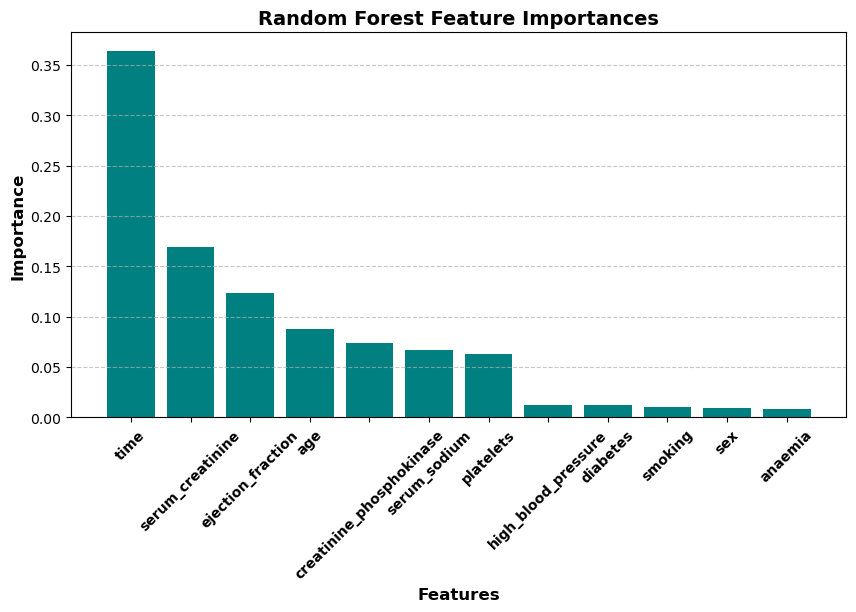

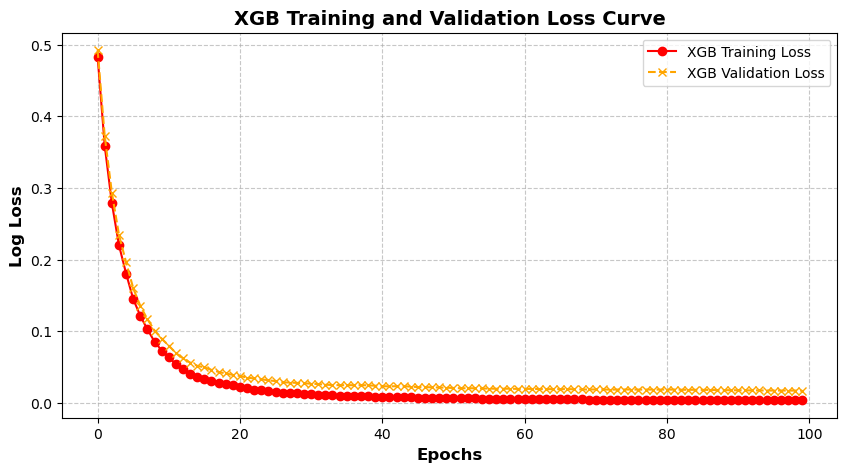

Stacking Classifier Accuracy: 0.993
Stacking Classifier F1 Score: 0.988835725677831

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       686
           1       0.99      0.99      0.99       314

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



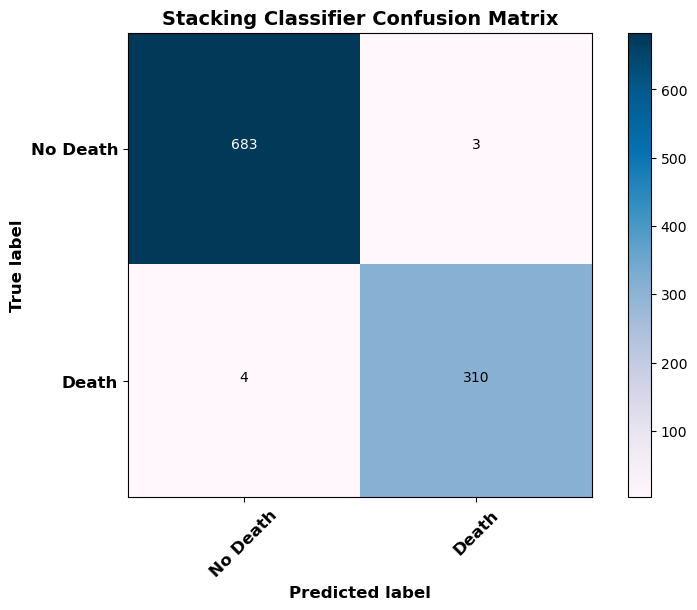

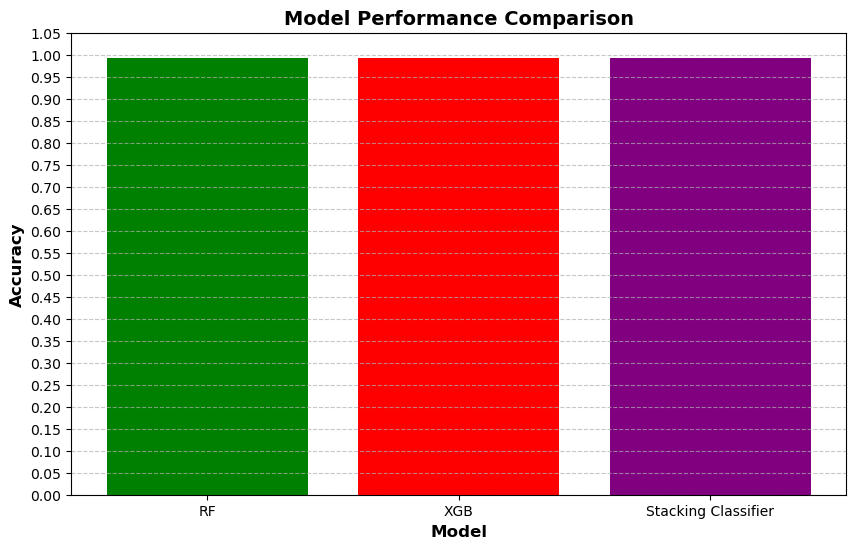

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Load your dataset
url = r"C:\Users\nagar\Downloads\heart_failure_clinical_records.csv"  # Replace with the actual path or URL to your dataset
data = pd.read_csv(url)

# Splitting features (X) and target (y)
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Handle class imbalance using SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize the dataset
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Initialize individual models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss')

# Fit the Random Forest model
rf_model.fit(X_train_resampled_scaled, y_train_resampled)

# Plot feature importance for Random Forest
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
plt.bar(range(X_train_resampled.shape[1]), importances[indices], color='teal', align='center')
plt.xticks(range(X_train_resampled.shape[1]), X_train.columns[indices], rotation=45, fontsize=10, fontweight='bold')  # Tilted x-axis labels
plt.xlabel('Features', fontsize=12, fontweight='bold')
plt.ylabel('Importance', fontsize=12, fontweight='bold')
plt.title('Random Forest Feature Importances', fontsize=14, fontweight='bold')
plt.xlim([-1, X_train_resampled.shape[1]])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Fit and plot XGB model
history_xgb = xgb_model.fit(X_train_resampled_scaled, y_train_resampled, eval_set=[(X_train_resampled_scaled, y_train_resampled), (X_test_scaled, y_test)], verbose=False)

# Plot XGB training and validation loss
results = history_xgb.evals_result()
plt.figure(figsize=(10, 5))
plt.plot(results['validation_0']['logloss'], color='red', linestyle='-', marker='o', label='XGB Training Loss')
plt.plot(results['validation_1']['logloss'], color='orange', linestyle='--', marker='x', label='XGB Validation Loss')
plt.xlabel('Epochs', fontsize=12, fontweight='bold')
plt.ylabel('Log Loss', fontsize=12, fontweight='bold')
plt.title('XGB Training and Validation Loss Curve', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Create and fit the Stacking Classifier
meta_model = LogisticRegression()
stacking_classifier = StackingClassifier(estimators=[
    ('rf', rf_model), 
    ('xgb', xgb_model)], 
    final_estimator=meta_model)
stacking_classifier.fit(X_train_resampled_scaled, y_train_resampled)

# Predict and evaluate the Stacking Classifier
y_pred = stacking_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Stacking Classifier Accuracy:", accuracy)
print("Stacking Classifier F1 Score:", f1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix for Stacking Classifier
conf_matrix_voting = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_voting, interpolation='nearest', cmap=plt.cm.PuBu)
plt.title('Stacking Classifier Confusion Matrix', fontsize=14, fontweight='bold')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['No Death', 'Death'], rotation=45, fontsize=12, fontweight='bold')
plt.yticks(tick_marks, ['No Death', 'Death'], fontsize=12, fontweight='bold')

thresh = conf_matrix_voting.max() / 2.
for i, j in np.ndindex(conf_matrix_voting.shape):
    plt.text(j, i, format(conf_matrix_voting[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix_voting[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label', fontsize=12, fontweight='bold')
plt.xlabel('Predicted label', fontsize=12, fontweight='bold')
plt.grid(False)
plt.show()

# Bar chart comparing model accuracies
model_names = ['RF', 'XGB', 'Stacking Classifier']
accuracies = [
    accuracy_score(y_test, RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train_resampled_scaled, y_train_resampled).predict(X_test_scaled)),
    accuracy_score(y_test, XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss').fit(X_train_resampled_scaled, y_train_resampled).predict(X_test_scaled)),
    accuracy
]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['green', 'red', 'purple'])
plt.xlabel('Model', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.ylim([0, 1])
plt.gca().set_yticks(np.arange(0, 1.1, 0.05))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier

# Load your dataset
url = r"C:\Users\nagar\Downloads\heart_failure_clinical_records.csv"  # Replace with the actual path or URL to your dataset
data = pd.read_csv(url)

# Splitting features (X) and target (y)
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Handle class imbalance using SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize the dataset
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Initialize individual models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss')
lgb_model = LGBMClassifier(n_estimators=100, random_state=42)
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
et_model = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Define model combinations
combinations = [
    [('rf', rf_model), ('xgb', xgb_model)],
    [('rf', rf_model), ('lgb', lgb_model)],
    [('rf', rf_model), ('mlp', mlp_model)],
    [('rf', rf_model), ('dt', dt_model)],
    [('rf', rf_model), ('et', et_model)],
    [('rf', rf_model), ('dt', dt_model), ('et', et_model)],
    [('rf', rf_model), ('xgb', xgb_model), ('lgb', lgb_model)],
    [('rf', rf_model), ('mlp', mlp_model), ('xgb', xgb_model), ('lgb', lgb_model)],
    [('rf', rf_model), ('et', et_model), ('mlp', mlp_model), ('xgb', xgb_model), ('lgb', lgb_model)],
    [('rf', rf_model), ('et', et_model), ('xgb', xgb_model)]
]

# Function to evaluate each model combination
def evaluate_model_combination(combination):
    meta_model = LogisticRegression()
    stacking_classifier = StackingClassifier(estimators=combination, final_estimator=meta_model)
    stacking_classifier.fit(X_train_resampled_scaled, y_train_resampled)
    
    y_pred = stacking_classifier.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    return accuracy, f1, report, conf_matrix

# Evaluate and print metrics for each combination
for i, combination in enumerate(combinations):
    print(f"Combination {i+1}: {[name for name, _ in combination]}")
    accuracy, f1, report, conf_matrix = evaluate_model_combination(combination)
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", conf_matrix)
    print("\n" + "-"*50 + "\n")


Combination 1: ['rf', 'xgb']
Accuracy: 0.995
F1 Score: 0.9920508744038156
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       686
           1       0.99      0.99      0.99       314

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       1.00      0.99      1.00      1000

Confusion Matrix:
 [[683   3]
 [  2 312]]

--------------------------------------------------

Combination 2: ['rf', 'lgb']
[LightGBM] [Info] Number of positive: 2746, number of negative: 2746
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001501 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 864
[LightGBM] [Info] Number of data points in the train set: 5492, number of used features: 12
[LightGBM] [Info] [binary:Boost

[LightGBM] [Info] Number of positive: 2197, number of negative: 2197
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000644 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 4394, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy: 0.996
F1 Score: 0.9936102236421726
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       686
           1       1.00      0.99      0.99       314

    accuracy                           1.00      1000
   macro avg       1.00      0.99      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Confusion Matrix:
 [[685   1]
 [  3 311]]

--------------------------------------------------

Combination 8: ['rf', 'mlp', 'xgb', 'lgb']
[LightGBM] [Info] Number of pos

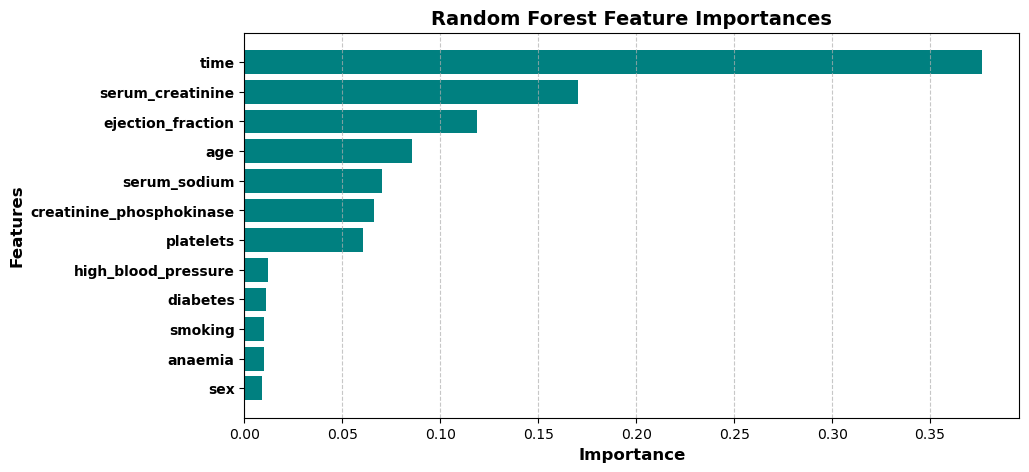

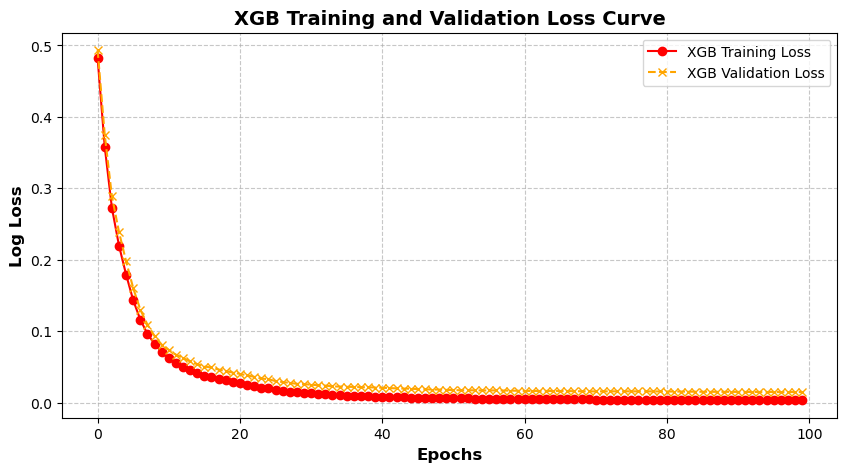

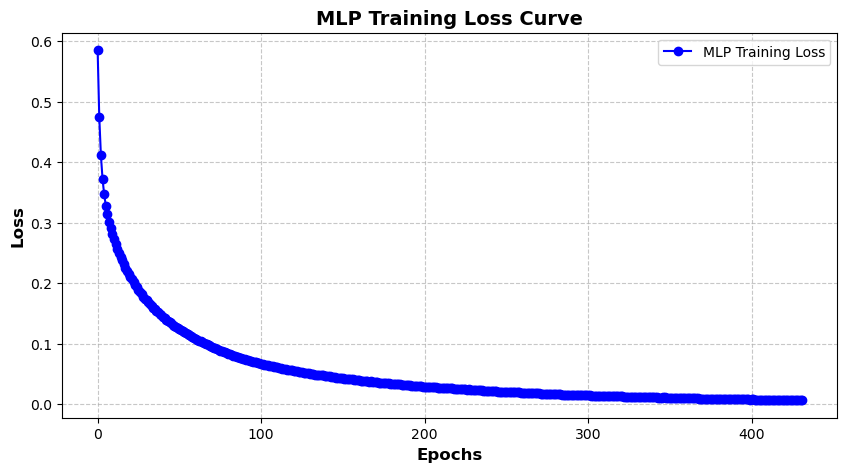

Stacking Classifier Accuracy: 0.996
Stacking Classifier F1 Score: 0.9936102236421726

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       686
           1       1.00      0.99      0.99       314

    accuracy                           1.00      1000
   macro avg       1.00      0.99      1.00      1000
weighted avg       1.00      1.00      1.00      1000



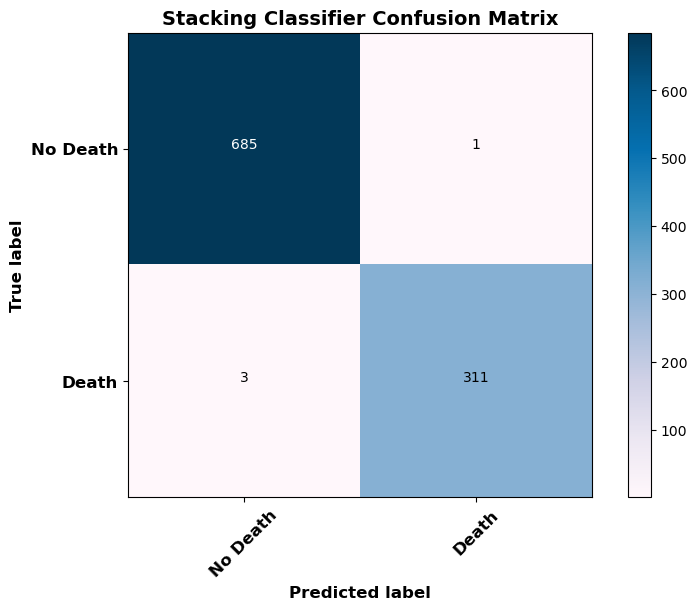

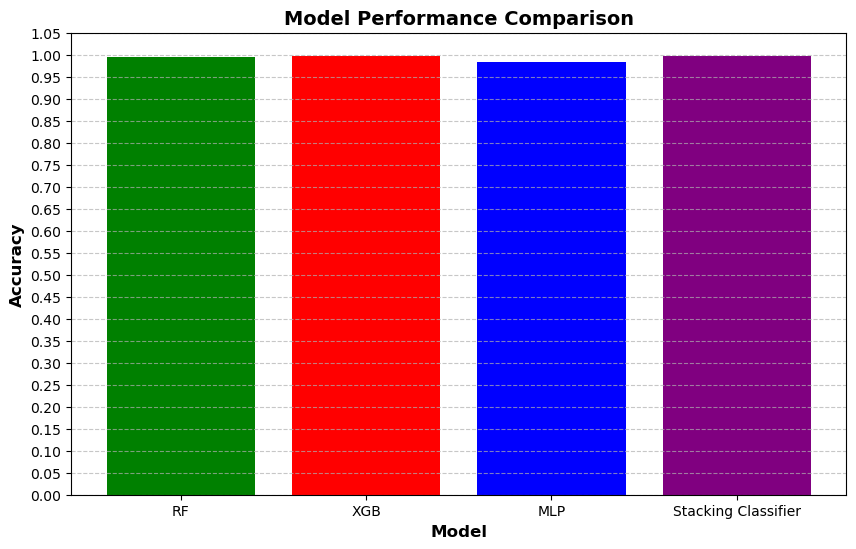

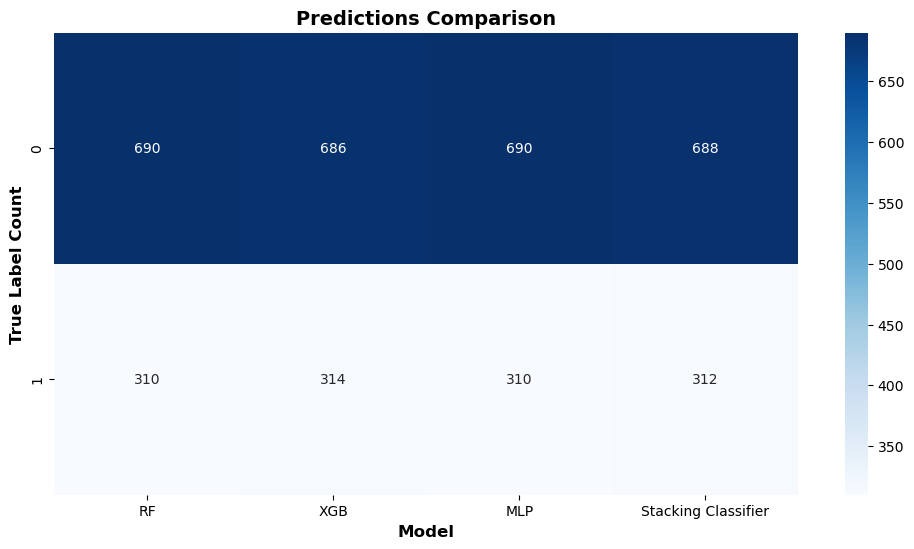

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Load your dataset
url = r"C:\Users\nagar\Downloads\heart_failure_clinical_records.csv"  # Replace with the actual path or URL to your dataset
data = pd.read_csv(url)

# Splitting features (X) and target (y)
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Handle class imbalance using SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize the dataset
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Initialize individual models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss')
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Fit the Random Forest model
rf_model.fit(X_train_resampled_scaled, y_train_resampled)

# Plot feature importance for Random Forest
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
plt.barh(range(X_train_resampled.shape[1]), importances[indices], color='teal', align='center')
plt.yticks(range(X_train_resampled.shape[1]), X_train.columns[indices], fontsize=10, fontweight='bold')  # Feature names on y-axis
plt.xlabel('Importance', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Random Forest Feature Importances', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Fit and plot XGB model
history_xgb = xgb_model.fit(X_train_resampled_scaled, y_train_resampled, eval_set=[(X_train_resampled_scaled, y_train_resampled), (X_test_scaled, y_test)], verbose=False)

# Plot XGB training and validation loss
results_xgb = history_xgb.evals_result()
plt.figure(figsize=(10, 5))
plt.plot(results_xgb['validation_0']['logloss'], color='red', linestyle='-', marker='o', label='XGB Training Loss')
plt.plot(results_xgb['validation_1']['logloss'], color='orange', linestyle='--', marker='x', label='XGB Validation Loss')
plt.xlabel('Epochs', fontsize=12, fontweight='bold')
plt.ylabel('Log Loss', fontsize=12, fontweight='bold')
plt.title('XGB Training and Validation Loss Curve', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Fit and plot MLP model
history_mlp = mlp_model.fit(X_train_resampled_scaled, y_train_resampled)

# Plot MLP training loss
plt.figure(figsize=(10, 5))
plt.plot(history_mlp.loss_curve_, color='blue', linestyle='-', marker='o', label='MLP Training Loss')
plt.xlabel('Epochs', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=12, fontweight='bold')
plt.title('MLP Training Loss Curve', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Create and fit the Stacking Classifier
meta_model = LogisticRegression()
stacking_classifier = StackingClassifier(estimators=[
    ('rf', rf_model), 
    ('xgb', xgb_model),
    ('mlp', mlp_model)], 
    final_estimator=meta_model)
stacking_classifier.fit(X_train_resampled_scaled, y_train_resampled)

# Predict and evaluate the Stacking Classifier
y_pred = stacking_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Stacking Classifier Accuracy:", accuracy)
print("Stacking Classifier F1 Score:", f1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix for Stacking Classifier
conf_matrix_voting = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_voting, interpolation='nearest', cmap=plt.cm.PuBu)
plt.title('Stacking Classifier Confusion Matrix', fontsize=14, fontweight='bold')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['No Death', 'Death'], rotation=45, fontsize=12, fontweight='bold')
plt.yticks(tick_marks, ['No Death', 'Death'], fontsize=12, fontweight='bold')

thresh = conf_matrix_voting.max() / 2.
for i, j in np.ndindex(conf_matrix_voting.shape):
    plt.text(j, i, format(conf_matrix_voting[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix_voting[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label', fontsize=12, fontweight='bold')
plt.xlabel('Predicted label', fontsize=12, fontweight='bold')
plt.grid(False)
plt.show()

# Bar chart comparing model accuracies
model_names = ['RF', 'XGB', 'MLP', 'Stacking Classifier']
accuracies = [
    accuracy_score(y_test, RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train_resampled_scaled, y_train_resampled).predict(X_test_scaled)),
    accuracy_score(y_test, XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss').fit(X_train_resampled_scaled, y_train_resampled).predict(X_test_scaled)),
    accuracy_score(y_test, MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42).fit(X_train_resampled_scaled, y_train_resampled).predict(X_test_scaled)),
    accuracy
]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['green', 'red', 'blue', 'purple'])
plt.xlabel('Model', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.ylim([0, 1])
plt.gca().set_yticks(np.arange(0, 1.1, 0.05))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Prediction comparison heatmap
predictions = {
    'RF': RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train_resampled_scaled, y_train_resampled).predict(X_test_scaled),
    'XGB': XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss').fit(X_train_resampled_scaled, y_train_resampled).predict(X_test_scaled),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42).fit(X_train_resampled_scaled, y_train_resampled).predict(X_test_scaled),
    'Stacking Classifier': stacking_classifier.predict(X_test_scaled)
}

predictions_df = pd.DataFrame(predictions)
plt.figure(figsize=(12, 6))
sns.heatmap(predictions_df.apply(lambda x: x.value_counts(), axis=0).fillna(0), annot=True, cmap='Blues', fmt='g')
plt.title('Predictions Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Model', fontsize=12, fontweight='bold')
plt.ylabel('True Label Count', fontsize=12, fontweight='bold')
plt.show()
